# Genetic Algorithm - Advertising

In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
random.seed(0)
%matplotlib inline

## Load Dataset

In [97]:
FILE_PATH = "data/advertising.csv"

In [98]:
def load_data_from_file(filepath):
    data = np.genfromtxt(filepath, dtype=None, delimiter=",", skip_header=1)
    ones_col = np.ones((data.shape[0], 1))
    
    X = np.hstack((ones_col, data[:, :3]))
    y = data[:, 3]
    return X, y


X, y = load_data_from_file(FILE_PATH)

In [99]:
print("Question 2: ")
X[:5, :]

Question 2: 


array([[  1. , 230.1,  37.8,  69.2],
       [  1. ,  44.5,  39.3,  45.1],
       [  1. ,  17.2,  45.9,  69.3],
       [  1. , 151.5,  41.3,  58.5],
       [  1. , 180.8,  10.8,  58.4]])

In [100]:
print("Question 3: ")
y.shape

Question 3: 


(200,)

## Genetic Algorithm Components for Optimization

In [101]:
def generate_random_values(bound=10):
    return (random.random() - 0.5) * bound


def create_individual(n=4, bound=10):
    return [generate_random_values(bound) for _ in range(n)]

individual = create_individual()
individual

[3.444218515250481, 2.5795440294030247, -0.79428419169155, -2.4108324970703663]

In [102]:
def compute_loss(individual):
    theta = np.array(individual)
    y_hat = X.dot(theta)
    loss = np.mean((y_hat - y) ** 2)
    return loss


def compute_fitness(individual):
    loss = compute_loss(individual)
    fitness_value = 0
    if loss != 0:
        fitness_value = 1 / loss
    else:
        fitness_value = float('inf')
    return fitness_value

In [103]:
individual = [4.09, 4.82, 3.10, 4.02]
fitness_score = compute_fitness(individual)

print("Question 4:")
fitness_score

Question 4:


1.0186001912541925e-06

In [104]:
def crossover(individual1, individual2, crossover_rate=0.9):
    individual1_new = individual1.copy()
    individual2_new = individual2.copy()
    for i in range(len(individual1)):
        if random.random() < crossover_rate:
            individual1_new[i], individual2_new[i] = individual2[i], individual1[i]
    return individual1_new, individual2_new

In [105]:
individual1 = [4.09, 4.82, 3.10, 4.02]
individual2 = [3.44, 2.57, -0.79, -2.41]
individual1, individual2 = crossover(individual1, individual2, 2.0)

print("Question 5:")
print("individual1 : ", individual1)
print("individual2 : ", individual2)

Question 5:
individual1 :  [3.44, 2.57, -0.79, -2.41]
individual2 :  [4.09, 4.82, 3.1, 4.02]


In [106]:
def mutate(individual, mutation_rate=0.05):
    individual_m = individual.copy()
    return [1 - val if random.random() < mutation_rate else val for val in individual_m]

In [107]:
before_individual = [4.09, 4.82, 3.10, 4.02]
after_individual = mutate(individual, mutation_rate=2.0)

print("Question 6:")
print(before_individual == after_individual)

Question 6:
False


In [108]:
def initializePopulation(m):
    return [create_individual() for _ in range(m)]

def selection(sorted_old_population, m=100):
    index1 = random.randint(0, m-1)
    while True:
        index2 = random.randint(0, m-1)
        if index2 != index1:
            break
    
    individual_m = sorted_old_population[index1]
    if index2 > index1:
        individual_m = sorted_old_population[index2]
    return individual_m


In [109]:
population = initializePopulation(100)
individual_s = selection(population, 100)
print(individual_s)

[-0.49436893368844825, 1.6024537862238897, 4.962578393535727, 4.169412179474561]


In [110]:
random.seed(0)

In [111]:
def create_new_population(old_population, elitism=2, gen=1):
    m = len(old_population)
    sorted_population = sorted(old_population, key=compute_fitness)
    
    if gen%1 == 0:
        print("Besst loss: ", compute_loss(sorted_population[m-1]), "with chromosome: ", sorted_population[m-1])
    
    new_population = []
    while len(new_population) < m-elitism:
        # selection
        individual1 = selection(sorted_population, m)
        individual2 = selection(sorted_population, m)
        
        # crosssover
        individual1, individual2 = crossover(individual1, individual2)
        
        # mutation
        individual1 = mutate(individual1)
        individual2 = mutate(individual2)
        
        new_population.append(individual1)
        new_population.append(individual2)
        
    new_population.extend(sorted_population[-elitism:])
    
    return new_population, compute_loss(sorted_population[m-1])

In [112]:
individual1 = [4.09, 4.82, 3.10, 4.02]
individual2 = [3.44, 2.57, -0.79, -2.41]
old_population = [individual1, individual2]

print("Question 7: ")
new_population, _ = create_new_population(old_population)

Question 7: 
Besst loss:  123415.051528805 with chromosome:  [3.44, 2.57, -0.79, -2.41]


In [113]:
def run_GA():
    n_generations = 100
    m = 600
    X, y = load_data_from_file(FILE_PATH)
    population = initializePopulation(m)
    losses_list = []
    for i in range(n_generations):
        population, loss = create_new_population(population)
        losses_list.append(loss)
        print("Best loss: ", loss, "with chromosome: ", population[m-1])
    return losses_list, population

Besst loss:  499.42870543645824 with chromosome:  [3.331600837968306, -0.09720038244186435, 1.449875562942834, -0.2732124726990648]
Best loss:  499.42870543645824 with chromosome:  [3.331600837968306, -0.09720038244186435, 1.449875562942834, -0.2732124726990648]
Besst loss:  499.42870543645824 with chromosome:  [3.331600837968306, -0.09720038244186435, 1.449875562942834, -0.2732124726990648]
Best loss:  499.42870543645824 with chromosome:  [3.331600837968306, -0.09720038244186435, 1.449875562942834, -0.2732124726990648]
Besst loss:  441.7022368914105 with chromosome:  [2.77602835828604, 0.06315811248085557, 1.1173993044653285, -0.24144039175892584]
Best loss:  441.7022368914105 with chromosome:  [2.77602835828604, 0.06315811248085557, 1.1173993044653285, -0.24144039175892584]
Besst loss:  441.7022368914105 with chromosome:  [2.77602835828604, 0.06315811248085557, 1.1173993044653285, -0.24144039175892584]
Best loss:  441.7022368914105 with chromosome:  [2.77602835828604, 0.0631581124808

 17.228558549995032 with chromosome:  [-3.219090077794494, 0.06315811248085557, 0.3479358318538053, -0.0032426087511825408]
Besst loss:  17.228558549995032 with chromosome:  [-3.219090077794494, 0.06315811248085557, 0.3479358318538053, -0.0032426087511825408]
Best loss:  17.228558549995032 with chromosome:  [-3.219090077794494, 0.06315811248085557, 0.3479358318538053, -0.0032426087511825408]
Besst loss:  16.23045642906053 with chromosome:  [-1.77602835828604, 0.06315811248085557, 0.3479358318538053, -0.0032426087511825408]
Best loss:  16.23045642906053 with chromosome:  [-1.77602835828604, 0.06315811248085557, 0.3479358318538053, -0.0032426087511825408]
Besst loss:  14.095386486736562 with chromosome:  [5.988571806855717, 0.06315811248085557, -0.11739930446532854, 0.046868558173902564]
Best loss:  14.095386486736562 with chromosome:  [5.988571806855717, 0.06315811248085557, -0.11739930446532854, 0.046868558173902564]
Besst loss:  12.564224891056629 with chromosome:  [-1.77602835828604,

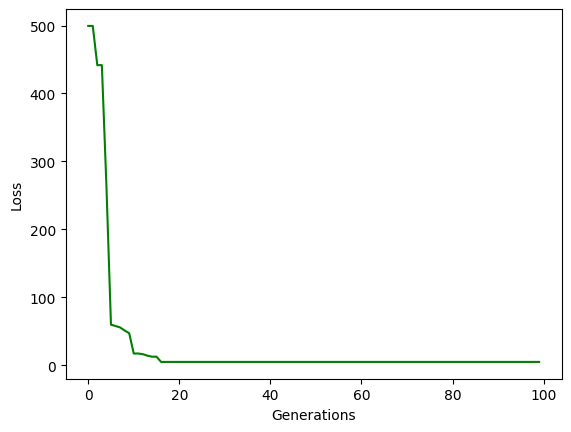

In [114]:
def visualize_loss(losses_list):
    plt.plot(losses_list, color="green")
    plt.xlabel("Generations")
    plt.ylabel("Loss")
    plt.show()

losses_list, population = run_GA()
visualize_loss(losses_list)

Best individual: [2.5828484103847895, 0.06315811248085557, 0.17571721781493266, -0.0032426087511825408]


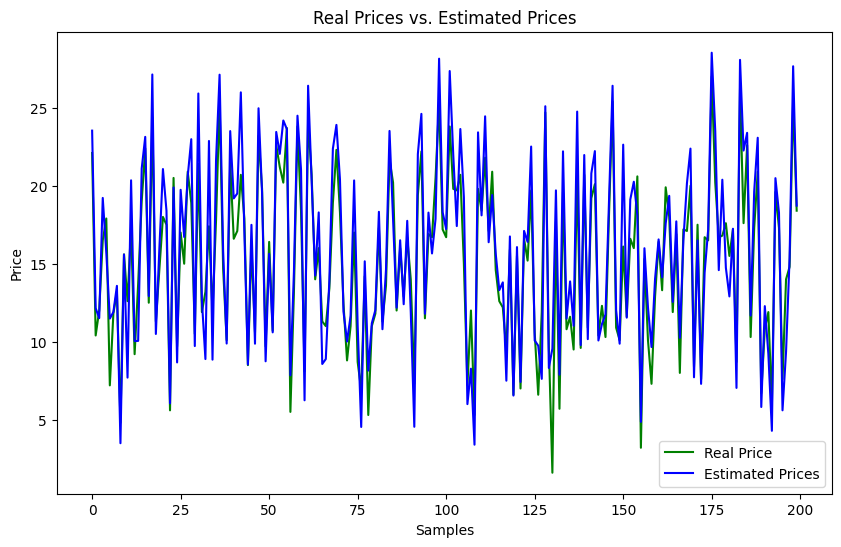

In [115]:
def visualize_predict_gt():
    sorted_population = sorted(population, key=compute_fitness)
    
    best_individual = sorted_population[-1]
    print("Best individual:", best_individual)

    theta = np.array(best_individual)
    
    estimated_prices = []
    for feature in X:
        estimated_price = np.dot(feature, theta)
        estimated_prices.append(estimated_price)
    estimated_prices = np.array(estimated_prices)
    
    fig, ax = plt.subplots(figsize=(10, 6))
    plt.xlabel("Samples")
    plt.ylabel("Price")
    plt.plot(y, c="green", label="Real Price") 
    plt.plot(estimated_prices, c="blue", label="Estimated Prices")
    plt.legend()
    plt.title("Real Prices vs. Estimated Prices")
    plt.show()

visualize_predict_gt()

[2.5828484103847895, 0.06315811248085557, 0.17571721781493266, -0.0032426087511825408]


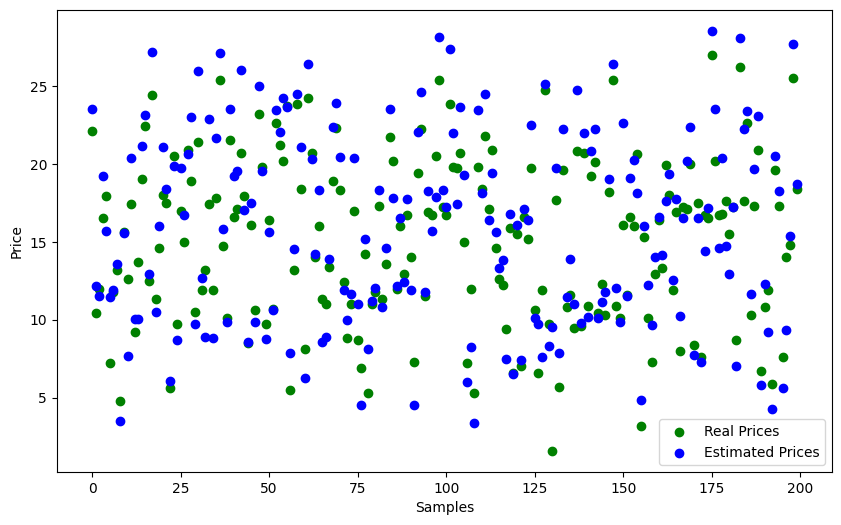

In [116]:
sorted_population = sorted(population, key=compute_fitness)
print(sorted_population[-1])
theta = np.array(sorted_population[-1])

estimated_prices = []
samples = [i for i in range(len(X))]
for feature in X:
    estimated_price = sum(c*x for x, c in zip(feature, theta))
    estimated_prices.append(estimated_price)
fig, ax = plt.subplots(figsize=(10, 6))

plt.xlabel('Samples')
plt.ylabel('Price')
plt.scatter(samples, y, c='green', label='Real Prices')
plt.scatter(samples, estimated_prices, c='blue', label='Estimated Prices')
plt.legend()
plt.show()